In [121]:
import sys
sys.path.append("../../")
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
with open("./S0-DN-eval.pkl", "rb") as f:
    sim_tracker_DN = pickle.load(f)
with open("./S0-revisit-evel.pkl", "rb") as f:
    sim_tracker_revisit = pickle.load(f)
    
with open("./S0-smart-random-eval.pkl", "rb") as f:
    sim_tracker_random = pickle.load(f)
    
with open("./S0-q-table-eval.pkl", "rb") as f:
    sim_tracker_qt = pickle.load(f)
    
    
SIMS = [sim_tracker_random, sim_tracker_revisit, sim_tracker_qt]
labels = ['Random', '90-min Revisit', 'Q-Table']

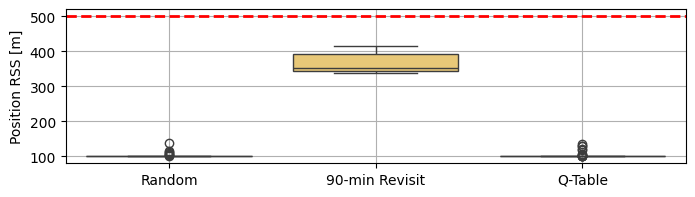

In [137]:

data = []

for sim in SIMS:
    data.append(sim.uncertainty_static)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
plt.axhline(y=np.mean(sim_tracker_DN.uncertainty_static), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Position RSS [m]')
plt.grid()
plt.show()

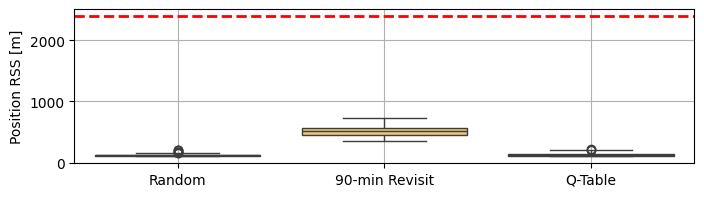

In [138]:

data = []

for sim in SIMS:
    data.append(sim.uncertainty_prop)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
plt.axhline(y=np.mean(sim_tracker_DN.uncertainty_prop), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Position RSS [m]')
plt.grid()
plt.show()

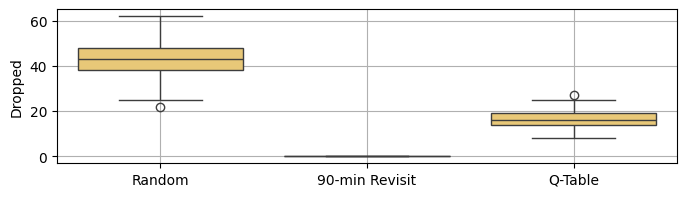

In [140]:

data = []
for sim in SIMS:
    data.append(sim.dropped_scheduling)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
#plt.axhline(y=np.mean(sim_tracker_DN.dropped_scheduling), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Dropped')
plt.grid()
plt.show()

In [134]:

# investigate
with open("./agent-q-table-S0.pkl", "rb") as f:
    q_table_agent = pickle.load(f)
for t in q_table_agent.q_table.q_table:
    for j in q_table_agent.q_table.q_table[t]:
        C = q_table_agent.q_table.q_table[t][j]
        if C[0]<C[1]:
            print(t,j)

30 30


In [135]:
q_table_agent.q_table.q_table

defaultdict(<function engine.util.indexing.dynamic_dict()>,
            {0: defaultdict(<function engine.util.indexing.dynamic_dict()>,
                         {-1: array([ 0.0e+00, -9.5e-06]),
                          0: array([2.12971573, 2.12853333]),
                          30: array([1.35573517, 1.01235886])}),
             30: defaultdict(<function engine.util.indexing.dynamic_dict()>,
                         {0: array([5.15254742, 4.84462484]),
                          30: array([1.51507815, 1.7307446 ]),
                          -1: array([ 0.00000000e+00, -4.32457414e-05]),
                          60: array([ 0.00000e+00, -2.04755e-06])}),
             60: defaultdict(<function engine.util.indexing.dynamic_dict()>,
                         {-1: array([ 0.00000000e+00, -4.50761455e-05]),
                          0: array([2.34220059, 1.68749771]),
                          30: array([1.36075806, 0.2214038 ]),
                          60: array([ 0.000e+00, -1.355e-06